In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections 
pd.options.display.max_columns = None
plt.style.use('classic')
%run ./data_cleaning.ipynb
df = temp_expanded_df

Stored 'temp_expanded_df' (DataFrame)


/home/ahmed/.local/lib/python3.10/site-packages/IPython/extensions/storemagic.py:229: UserWarning: using autorestore/temp_expanded_df requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [40]:
df

,gender,group,parent_education,lunch_type,test_preparation,parent_marital_status,practice_sport,first_child,number_of_siblings,transportation,week_study_hours,math_score,reading_score,writing_score,total_socre,gpa
0,female,Europeans,bachelor's degree,standard,No,married,regularly,yes,3.0,school_bus,< 5,71,71,74,216,B
1,female,Asians,college,standard,not_detected,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,247,B
2,female,Africans,master's degree,standard,No,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,271,A
3,male,Europeans,associate's degree,free/reduced,No,married,never,no,1.0,school_bus,5 - 10,45,56,42,143,F
4,male,Asians,college,standard,No,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,229,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,Americans,high school,standard,No,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,185,C
30637,male,Australians,high school,standard,No,single,regularly,no,1.0,private,5 - 10,58,53,51,162,D
30638,female,Europeans,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,198,C
30639,female,Americans,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,265,B


/tmp/ipykernel_35285/724057455.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_35285/724057455.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


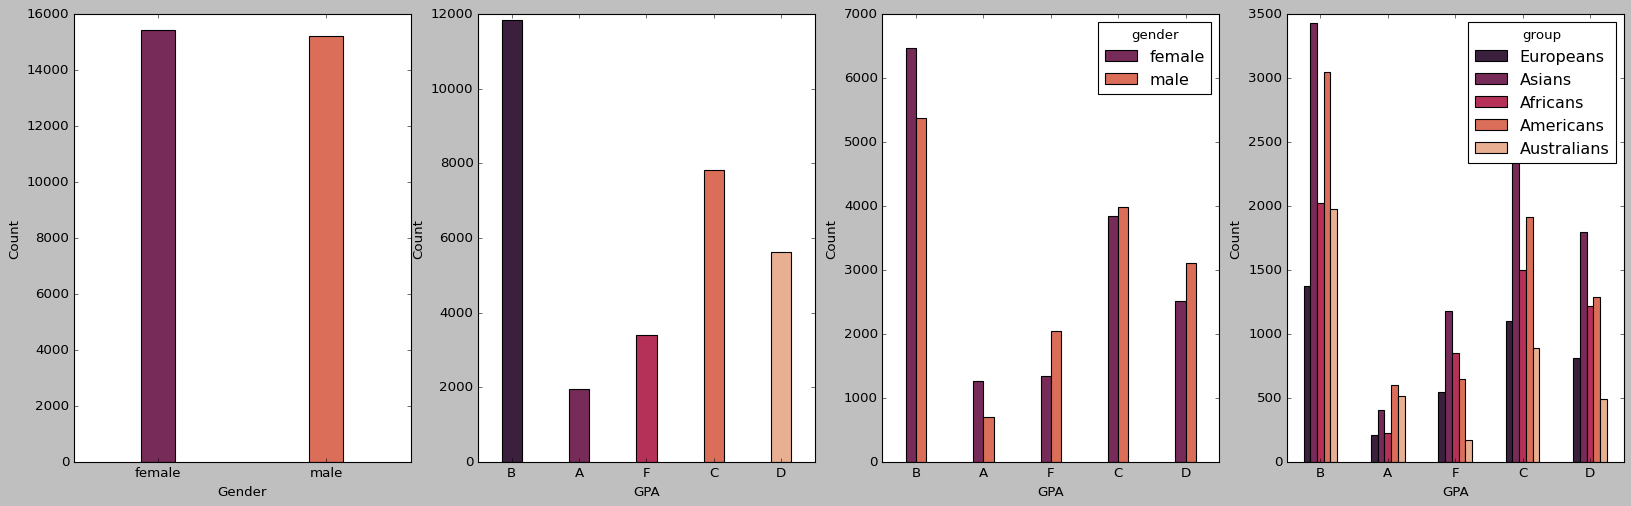

In [41]:
fig, axe = plt.subplots(1,4, figsize=(25,7))


#count the gender of students
sns.countplot(
    data=df,
    x='gender',
    width=.2,
    palette='rocket',
    ax=axe[0],
)
axe[0].set_label('distribution of gender')
axe[0].set_xlabel('Gender')
axe[0].set_ylabel('Count')

#count the gpa for students
sns.countplot(
    data=df,
    x='gpa',
    width=.3,
    palette='rocket',
    ax=axe[1]
)
axe[1].set_label('Total GPAs')
axe[1].set_xlabel('GPA')
axe[1].set_ylabel('Count')

#count the gpa for students by gender
sns.countplot(
    data=df,
    x='gpa',
    hue='gender',
    width=.3,
    palette='rocket',
    ax=axe[2]
)
axe[3].set_label('Total GPAs by gender')
axe[2].set_xlabel('GPA')
axe[2].set_ylabel('Count')


#count the gpa for students by group
sns.countplot(
    data=df,
    x='gpa',
    hue='group',
    width=.5,
    palette='rocket',
    ax=axe[3]
)
axe[3].set_label('Total GPAs by group')
axe[3].set_xlabel('GPA')
axe[3].set_ylabel('Count')


plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight 1: the number of males and females is so close </b><br>
        <b>Insight 2: the most students get GPA B</b><br>
        <b>Insight 3: the Asians students has the most GPAs in all grades except Grad A</b><br>
    </span>    
</div>

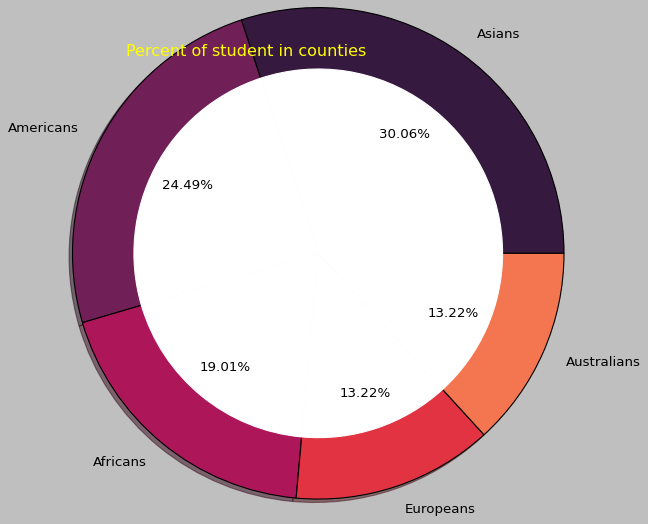

In [42]:
country = dict(df['group'].value_counts())
count = df['group'].value_counts()

plt.pie(
    count,
    labels=country,
    shadow=True,
    wedgeprops={"edgecolor": "black"},
    startangle=0,
    autopct="%3.2f%%",
    radius=1.6,
    textprops={'fontsize' : 12},
    colors = sns.color_palette('rocket')
)
plt.pie(
    x=count,
    radius=1.2,
    colors="w",
    wedgeprops={"edgecolor": "white"},
)
plt.title('Percent of student in counties', loc = 'left', color='yellow')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: Asians and Americans has the highest number of students</b><br>
    </span>    
</div>

/tmp/ipykernel_35285/3859458399.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


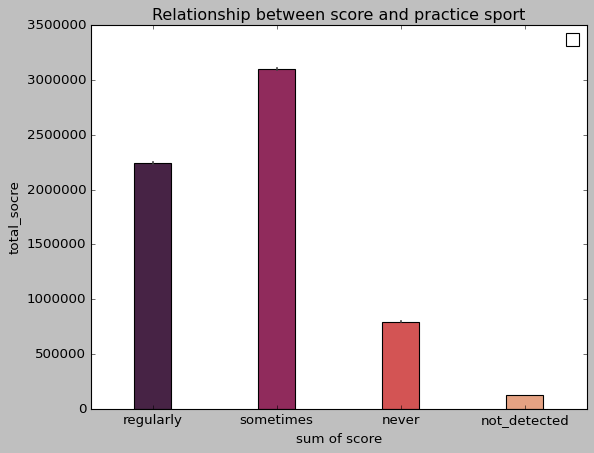

In [43]:
sns.barplot(
    data= df,
    x = 'practice_sport',
    y = 'total_socre',
    palette = 'rocket',
    width = .3,
    estimator = 'sum',
)

plt.xlabel('practice sport')
plt.xlabel('sum of score')
plt.title('Relationship between score and practice sport')
plt.legend()
plt.show()


/tmp/ipykernel_35285/1867758601.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


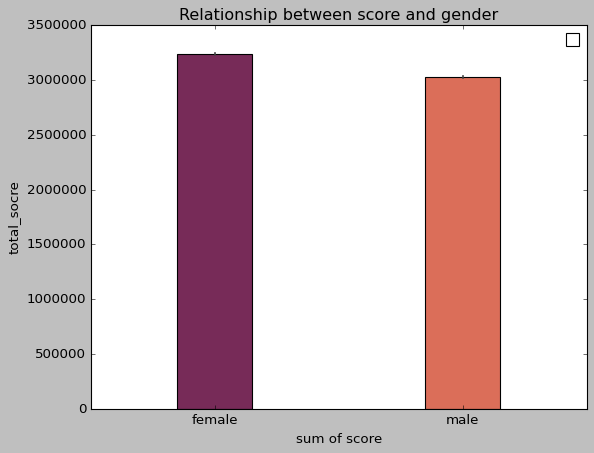

In [44]:
sns.barplot(
    data= df,
    x = 'gender',
    y = 'total_socre',
    palette = 'rocket',
    width = .3,
    estimator = 'sum',
)

plt.xlabel('gender')
plt.xlabel('sum of score')
plt.title('Relationship between score and gender')
plt.legend()
plt.show()


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: female has totoal score greater than male</b><br>
    </span>    
</div>

/tmp/ipykernel_35285/726476443.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


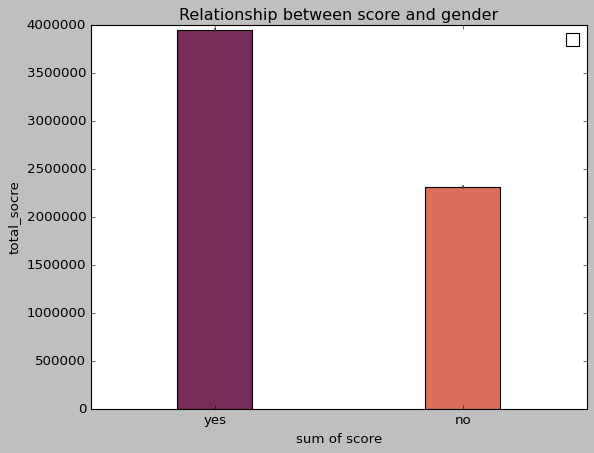

In [45]:
sns.barplot(
    data= df,
    x = 'first_child',
    y = 'total_socre',
    palette = 'rocket',
    width = .3,
    estimator = 'sum',
)

plt.xlabel('gender')
plt.xlabel('sum of score')
plt.title('Relationship between score and gender')
plt.legend()
plt.show()


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: when studen is first child, the total score for him increaced</b><br>
    </span>    
</div>

/tmp/ipykernel_35285/709773303.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


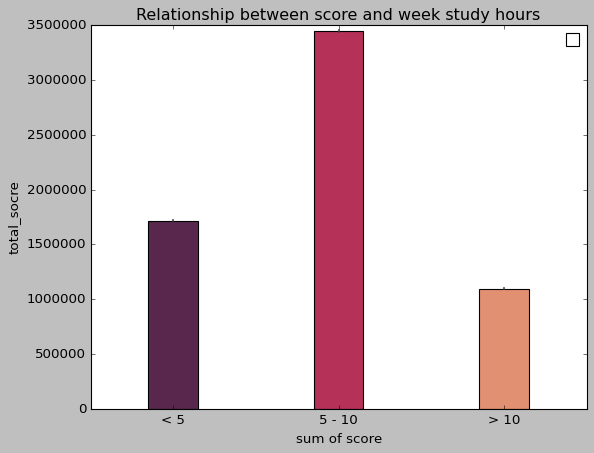

In [46]:
sns.barplot(
    data= df,
    x = 'week_study_hours',
    y = 'total_socre',
    palette = 'rocket',
    width = .3,
    estimator = 'sum',
)

plt.xlabel('week study hours')
plt.xlabel('sum of score')
plt.title('Relationship between score and week study hours')
plt.legend()
plt.show()


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: as you see, when the number of hours increaces the score also increaces</b><br>
    </span>    
</div>

/tmp/ipykernel_35285/147661545.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


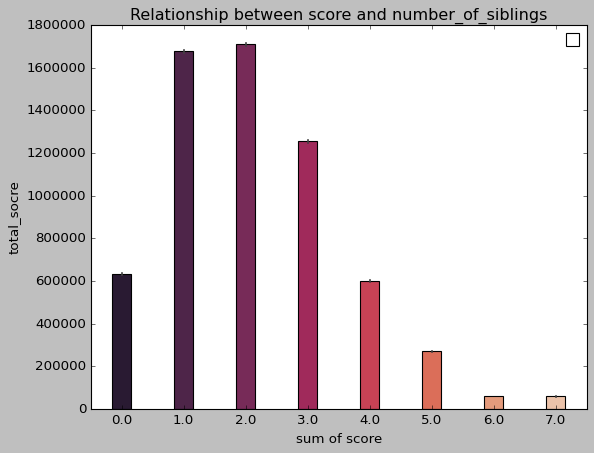

In [47]:
sns.barplot(
    data= df,
    x = 'number_of_siblings',
    y = 'total_socre',
    palette = 'rocket',
    width = .3,
    estimator = 'sum',
)

plt.xlabel('number of siblings')
plt.xlabel('sum of score')
plt.title('Relationship between score and number_of_siblings')
plt.legend()
plt.show()


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: when the number of siblings decreased the score increased</b><br>
    </span>    
</div>